<table align="center" width=100%>
    <tr>
        <td width="15%">
            <img src="in_class.png">
        </td>
        <td>
            <div align="center">
                <font color="#21618C" size=8px>
                    <b> Inclass - Lab <br>(Week-2)
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

### About the data set (Detected Cases of Malaria)

This dataset consists of data for countries with an active malaria outbreak.
<br>

Attribute Information:

**Cases_Guinea**: Number of cases of malaria reported from Guinea

**Cases_Liberia**: Number of cases of malaria reported from Liberia

**Cases_SierraLeone**: Number of cases of malaria reported from Sierra Leone

**Cases_Nigeria**: Number of cases of malaria reported from Nigeria

**Cases_Senegal**: Number of cases of malaria reported from Senegal

**Cases_UnitedStates**: Number of cases of malaria reported from the United States of America

**Cases_Spain**: Number of cases of malaria reported from Spain

**Cases_Mali**: Number of cases of malaria reported from Mali

**Deaths_Guinea**: Number of deaths reported out of the detected cases of malaria from Guinea

**Deaths_Liberia**: Number of deaths reported out of the detected cases of malaria from Liberia

**Deaths_SierraLeone**: Number of deaths reported out of the detected cases of malaria from Sierra Leone

**Deaths_Nigeria**: Number of deaths reported out of the detected cases of malaria from Nigeria

**Deaths_Senegal**: Number of deaths reported out of the detected cases of malaria from Senegal

**Deaths_UnitedStates**: Number of deaths reported out of the detected cases of malaria from the United States of America

**Deaths_Spain**: Number of deaths reported out of the detected cases of malaria from Spain

**Deaths_Mali**: Number of deaths reported out of the detected cases of malaria from Mali

##  Table of Content

1. **[Missing Values Detection](#msv)**
2. **[Handling Missing Values](#hmsv)**
3. **[Outlier Detection Techniques](#out)**
4. **[Treatment of Outliers](#odt)**
5. **[Feature Engineering](#fe)**
6. **[Train-Test Split](#split)**

**Import the required libraries**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import warnings
warnings.filterwarnings('ignore')

#### Load the malaria dataset and display the first five records (Use for section 1, 2)

In [2]:
df_mal=pd.read_csv('malaria.csv')
df_mal.head()

,Cases_Guinea,Cases_Liberia,Cases_SierraLeone,Cases_Nigeria,Cases_Senegal,Cases_UnitedStates,Cases_Spain,Cases_Mali,Deaths_Guinea,Deaths_Liberia,Deaths_SierraLeone,Deaths_Nigeria,Deaths_Senegal,Deaths_UnitedStates,Deaths_Spain,Deaths_Mali
0,2776.0,NaN,10030.0,NaN,NaN,NaN,NaN,NaN,1786.0,NaN,2977.0,NaN,NaN,NaN,NaN,NaN
1,2775.0,NaN,9780.0,NaN,NaN,NaN,NaN,NaN,1781.0,NaN,2943.0,NaN,NaN,NaN,NaN,NaN
2,2769.0,8166.0,9722.0,NaN,NaN,20.0,NaN,NaN,1767.0,3496.0,2915.0,NaN,NaN,3.0,NaN,NaN
3,NaN,8157.0,NaN,NaN,NaN,10.0,NaN,NaN,NaN,3496.0,NaN,NaN,NaN,8.0,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


### Let's begin with some hands-on practice exercises

<a id="msv"> </a>
## 1. Missing Values Detection

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>1. Are there any records where no data has been reported?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [3]:
na_data = df_mal.isnull()
df = na_data.all(axis = 'columns') == True
df.index[df == True].tolist()

[4, 21, 39, 99]

In [4]:
# For the index values 4, 21, 39, 99, there are no data reported.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>2. Find a list of all the columns which have more than 60% of their values missing</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [4]:
per = df_mal.isnull().sum() / len(df_mal) *100
per[per>60].round(2)


Cases_Nigeria     70.08
Cases_Senegal     80.31
Cases_Spain       87.40
Cases_Mali        90.55
Deaths_Nigeria    70.08
Deaths_Senegal    82.68
Deaths_Spain      87.40
Deaths_Mali       90.55
dtype: float64

In [5]:
#For the above mentioned columns, 60% of their values are missing

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>3. In a scenario where one of the countries detected with malaria outbreak is to be recorded again for observations, which country should be considered first (consider only the first four countries)?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [20]:


print('Missing values for Guinea :',df_mal[['Cases_Guinea','Deaths_Guinea']].isnull().sum().sum())
print('Missing values for Liberia :',df_mal[['Cases_Liberia','Deaths_Liberia']].isnull().sum().sum())
print('Missing values for SierraLeone :',df_mal[['Cases_SierraLeone','Deaths_SierraLeone']].isnull().sum().sum())
print('Missing values for Nigeria :',df_mal[['Cases_Nigeria','Deaths_Nigeria']].isnull().sum().sum())


Missing values for Guinea : 69
Missing values for Liberia : 90
Missing values for SierraLeone : 80
Missing values for Nigeria : 178


In [21]:
#We can consider either Guinea or Nigeria. 
#In the case of Guinea, missing values are low in the existing data set, so further investigating will give us confirmations.
#Whereas in the case of Nigeria, there are high null values. Maybe, during the next observation, we may get more data to 
# predict the situation better in Nigeria

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>4. Visualize the missing values in the data</b>
                </font>
            </div>
        </td>
    </tr>
</table>

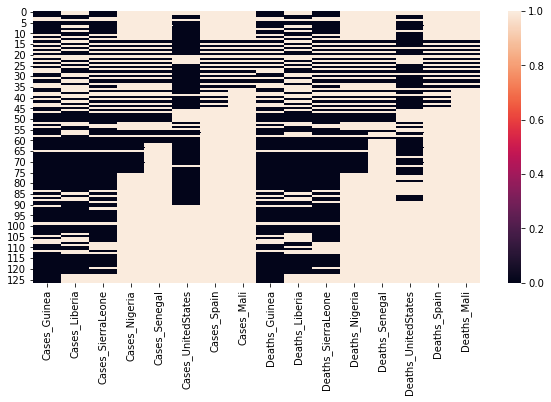

In [22]:
plt.figure(figsize = (10,5))
sns.heatmap(df_mal.isnull())
plt.show()

<a id="hmsv"> </a>
## 2. Handling Missing Values

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>5. Eliminate all the records where no more than two observations have been recorded</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [23]:
df_mal_updated = df_mal.dropna(thresh=3)
print('Shape before dropping:',df_mal.shape)
print('Shape after dropping:',df_mal_updated.shape)


Shape before dropping: (127, 16)
Shape after dropping: (110, 16)


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>6. Cast aside the unnecessary columns from the data
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [24]:
threshold = 0.8*df_mal.shape[0]
na_vals = df_mal.isnull().sum()
drops = list(na_vals.index[na_vals> threshold]) 
df_mal.drop(drops, axis=1, inplace = True)
df_mal.shape

(127, 10)

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>7. How would you treat the missing values of the reported cases from Liberia?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Null values before treatment : 44
Null values after treatment : 0


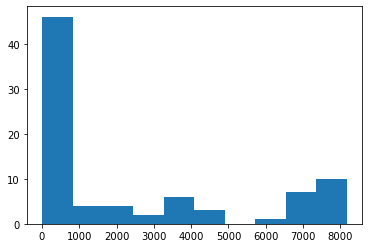

In [25]:
plt.hist(x=df_mal['Cases_Liberia'])
print('Null values before treatment :', df_mal['Cases_Liberia'].isnull().sum())
df_mal['Cases_Liberia'] = df_mal['Cases_Liberia'].fillna(df_mal['Cases_Liberia'].median())
print('Null values after treatment :', df_mal['Cases_Liberia'].isnull().sum())

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>8. How would you treat the missing values from the reported cases of malaria from the United States of America?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

Null values before treatment : 54
Null values after treatment : 0


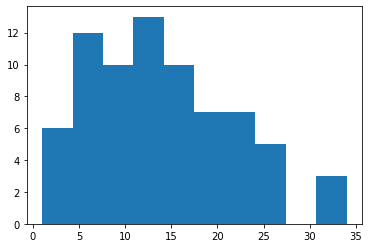

In [10]:
plt.hist(x=df_mal['Cases_UnitedStates'])
print('Null values before treatment :', df_mal['Cases_UnitedStates'].isnull().sum())
df_mal['Cases_UnitedStates'] = df_mal['Cases_UnitedStates'].fillna(df_mal['Cases_UnitedStates'].mean())
print('Null values after treatment :', df_mal['Cases_UnitedStates'].isnull().sum())

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>9. How should the missing values from the observations recorded in 'Guinea' be dealt with?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

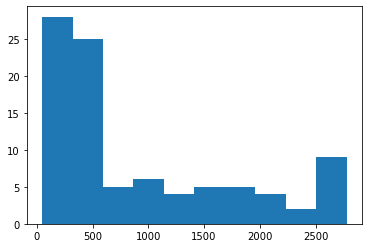

Null values before treatment : 34
Null values after treatment : 0


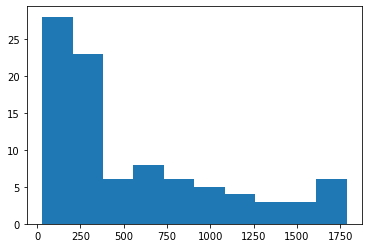

Null values before treatment : 35
Null values after treatment : 0


In [11]:
plt.hist(x=df_mal['Cases_Guinea'])
plt.show()
print('Null values before treatment :', df_mal['Cases_Guinea'].isnull().sum())
df_mal['Cases_Guinea'] = df_mal['Cases_Guinea'].fillna(df_mal['Cases_Guinea'].mean())
print('Null values after treatment :', df_mal['Cases_Guinea'].isnull().sum())

plt.hist(x=df_mal['Deaths_Guinea'])
plt.show()
print('Null values before treatment :', df_mal['Deaths_Guinea'].isnull().sum())
df_mal['Deaths_Guinea'] = df_mal['Deaths_Guinea'].fillna(df_mal['Deaths_Guinea'].mean())
print('Null values after treatment :', df_mal['Deaths_Guinea'].isnull().sum())

## For questions hereon, we shall consider the following dataset.

### About the dataset (House Prices in Melbourne)

The dataset contains different attributes that contribute to the price of the houses in Melbourne.  

Attribute Information:

**Rooms**: Number of rooms

**Type**: h - house,cottage,villa, semi,terrace; u - unit, duplex; t - townhouse; dev site - development site; o res - other residential.

**Price**: Price in dollars

**Method**: S - property sold; SP - property sold prior; PI - property passed in; PN - sold prior not disclosed; SN - sold not disclosed; NB - no bid; VB - vendor bid; W - withdrawn before auction; SA - sold after auction; SS - sold after auction price not disclosed. N/A - price or highest bid not available.

**Regionname**:  General Region (West, North West, North, Northeast,...)

**Bathroom**: Number of Bathrooms

**Car**: Number of car spots

**Landsize**: Land Size of a house

**Distance**: Distance from CBD (City Centre)

**Bedroom**: Number of Bedrooms

#### Load the house dataset and display the first five records (Use for section 3 to 6)

In [26]:
df_house=pd.read_csv('ouse.csv')
df_house.head()

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
0,3,h,1490000,S,Northern Metropolitan,1,1,126,25.2,2
1,3,h,1220000,S,Northern Metropolitan,1,1,202,21.8,2
2,3,h,1420000,S,Northern Metropolitan,1,0,156,21.7,2
3,3,h,1515000,S,Western Metropolitan,2,1,0,18.8,3
4,2,h,670000,S,Western Metropolitan,2,0,134,20.6,3


<a id="out"> </a>
## 3. Outlier Detection Techniques 

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>10. Is there a feature in the dataset which could be exempted from outlier treatment?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

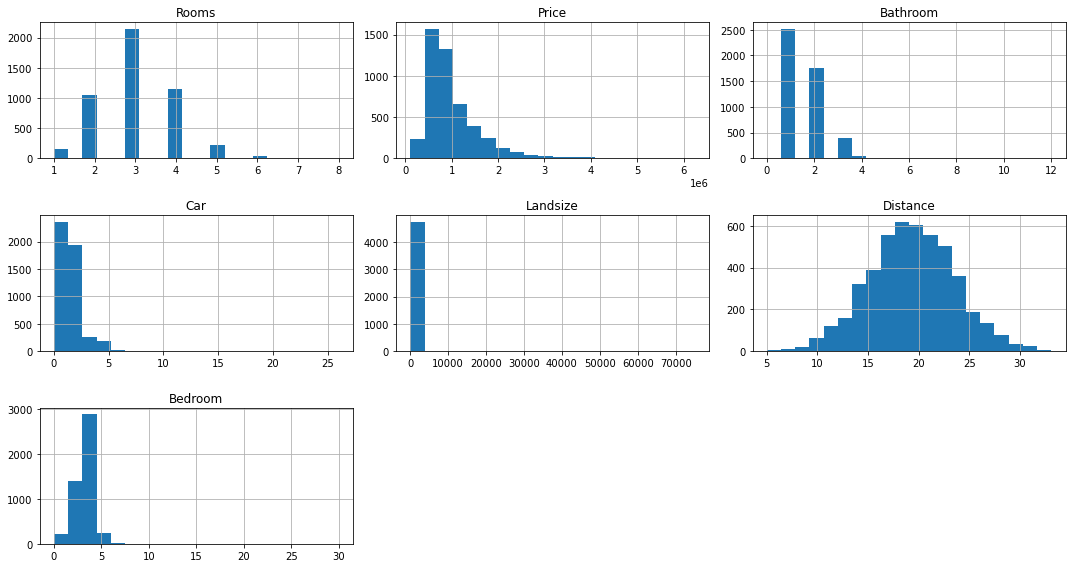

In [30]:
df_house.hist(bins=20, figsize=(15,8))
plt.tight_layout()
plt.show()

In [49]:
#Among the features in the data set, Rooms, bathroom and bedroom can be exempted from Outlier treatment, as the extreme values
# are very much less than the majority of the values

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>11. How do we check the outlier values for the feature representing the number of car spots?</b>
                </font>
            </div>
        </td>
    </tr>
</table>

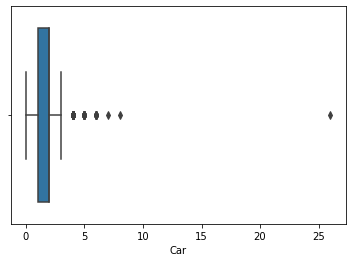

1     2035
2     1942
0      331
3      252
4      171
5       20
6       12
8        1
26       1
7        1
Name: Car, dtype: int64

In [52]:
sns.boxplot(df_house['Car'])
plt.show()
df_house['Car'].value_counts()

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>12. Compare the outliers present in the price of real estates by their type
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

<AxesSubplot:xlabel='Type', ylabel='Price'>

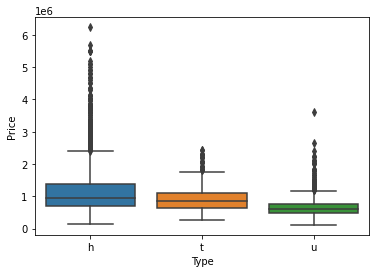

In [15]:
sns.boxplot(x=df_house['Type'], y=df_house['Price'])

In [53]:
#Majority of the outliers are present in the h type real estate compared to other two types

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>13. What would be the extreme values for the feature representing the number of rooms?
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [28]:

outliers = []

data = df_house['Rooms']
mean = np.mean(df_house['Rooms'])
std = np.std(df_house['Rooms'])

for x in data:
    z_score = (x-mean) / std
    if abs(z_score) > 3:
        outliers.append(x)
        
print('Outliers are :', set(outliers))

Outliers are : {8, 6, 7}


In [54]:
#The extreme values for the Number of rooms feature are 6,7,8.

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>14. Suggest a method to find the outlier values for the feature representing the number of bathrooms
 </b>
                </font>
            </div>
        </td>
    </tr>
</table>

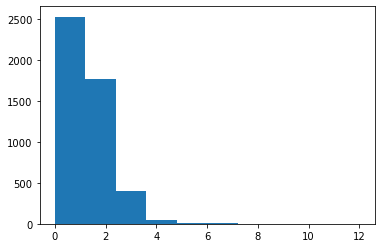

In [55]:
plt.hist(df_house['Bathroom'])
plt.show()

#We can go for IQR method

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>15. Extract the records corresponding to the extreme outliers present in the feature representing the number of bedrooms
                    </b>
                </font>
            </div>
        </td>
    </tr>
</table>

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom
279,3,t,1100000,S,Southern Metropolitan,1,1,0,12.1,8
467,2,u,612000,S,South-Eastern Metropolitan,1,2,766,27.1,9
1228,3,h,470000,PI,Western Metropolitan,2,2,486,20.9,9
1937,3,h,496000,S,Western Metropolitan,1,1,0,21.7,30
4241,3,h,825000,S,Eastern Metropolitan,2,2,296,21.2,8
4249,3,t,750000,S,Western Metropolitan,2,0,311,22.1,8


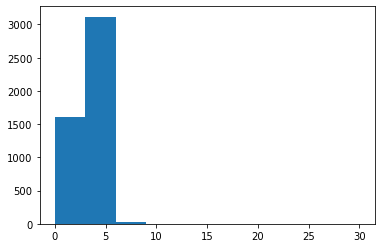

In [56]:
plt.hist(df_house['Bedroom'])
Q1 = df_house['Bedroom'].quantile(0.25)
Q3 = df_house['Bedroom'].quantile(0.75)

IQR = Q3-Q1

df_house[df_house['Bedroom'] > Q3+1.5*IQR]

In [57]:
#Above shown records represent the extreme outliers present in the number of bedrooms

<a id="odt"> </a>
## 4. Treatment of Outliers

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>16. What is the change in the average distance after handling the outliers using IQR method in the feature representing the distance?  
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [58]:
print('Average distance before treatment :', df_house['Distance'].mean())
Q1 = df_house['Distance'].quantile(0.25)
Q3 = df_house['Distance'].quantile(0.75)

IQR = Q3-Q1

df_distance_updated = df_house[~((df_house['Distance']<(Q1-1.5*IQR)) | (df_house['Distance']>(Q3+1.5*IQR)))]
print('Average distance after treatment :', df_distance_updated['Distance'].mean())

Average distance before treatment : 19.32834662190515
Average distance after treatment : 19.311425554382247


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>17. What should be the range (K*IQR) considered to eliminate the extreme outliers for the feature representing the house price? 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

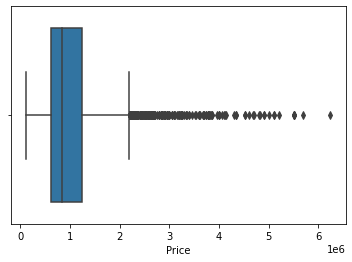

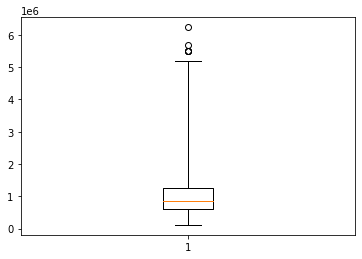

In [47]:
sns.boxplot(df_house['Price'])
plt.show()
plt.boxplot(df_house['Price'], whis=6.5)
plt.show()

<a id="fe"> </a>
## 5. Feature Engineering

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>18. Categorize the houses in three groups based on their distance from CBD and create a new feature containing the group labels
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [65]:
df_house['Distance'].describe()

def new_cat(dist):
    if (dist>=5) & (dist<15):
        return 'Nearby'
    if (dist>=15) & (dist <25):
        return 'Far'
    if (dist >=25):
        return 'Very Far'

df_house['Distance_label'] = df_house['Distance'].apply(new_cat)

df_house.sample(5)

,Rooms,Type,Price,Method,Regionname,Bathroom,Car,Landsize,Distance,Bedroom,Distance_label
1400,3,t,882000,S,Eastern Metropolitan,2,2,510,13.4,1,Nearby
2217,5,h,460000,S,Western Victoria,3,2,654,29.7,2,Very Far
2185,2,u,682000,S,Southern Metropolitan,2,1,203,14.9,4,Nearby
4697,3,h,807000,S,Western Metropolitan,1,1,0,15.5,2,Far
459,2,h,570000,SP,Eastern Metropolitan,1,1,580,16.2,3,Far


<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>19. Compare the house prices based on the different distance levels 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

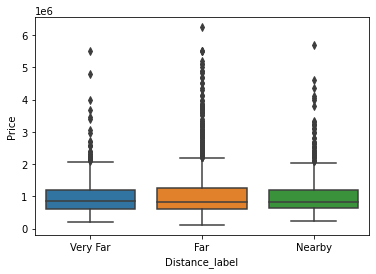

In [57]:
sns.boxplot(x=df_house['Distance_label'], y=df_house['Price'])
plt.show()

In [66]:
#There are not much significant difference in the house price based on distance levels. But there are more outliers in the
# Far region than any other distance labels

<a id="split"> </a>
## 6. Train-Test Split

<table align="left">
    <tr>
        <td width="6%">
            <img src="question_icon.png">
        </td>
        <td>
            <div align="left", style="font-size:120%">
                <font color="#21618C">
                    <b>20. Split the price of houses in the proportion 80:20 
</b>
                </font>
            </div>
        </td>
    </tr>
</table>

In [67]:
from sklearn.model_selection import train_test_split

price_train, price_test = train_test_split(df_house['Price'], test_size = 0.2, random_state = 10)

print('Price train set', price_train.shape)
print('Price test set', price_test.shape)

Price train set (3812,)
Price test set (954,)
